# 320to335 (15-30 November)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

from catboost import Pool, CatBoostRegressor, cv 
from catboost.utils import eval_metric

# Data

In [14]:
df = pd.read_stata('T:\\COVID19\\Makrodaten\\Nov15-30.dta')

In [15]:
Y = df['std_inz_AGS_320to335']
X = df.loc[:, ~df.columns.isin(['std_inz_AGS_320to335'])]
f_names = list(X.columns)
print("Number of features: ", len(X.columns))

Number of features:  969


# Feature Correlation

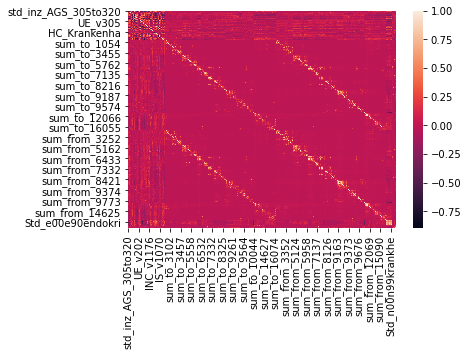

In [16]:
corr = X.corr()
sns.heatmap(corr)

In [17]:
pairs = []

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.8:
            pairs.append(corr.columns[[i,j]][0])
            pairs.append(corr.columns[[i,j]][1])
            print(corr.columns[[i,j]],corr.iloc[i,j])
            

Index(['D_Lebens', 'D_v599'], dtype='object') 0.9204456724863153
Index(['D_Lebens', 'HC_Vorzeitig'], dtype='object') -0.853570725481162
Index(['UE_ArbquoteJ', 'PO_SGBII_'], dtype='object') 0.8310490758054104
Index(['UE_AntreBesc', 'UE_AnteBesch'], dtype='object') -0.8073819685836338
Index(['UE_BesePrima', 'UE_v305'], dtype='object') 0.8333318048923829
Index(['UE_Erwerb', 'SSE_Einwohner'], dtype='object') 0.8980642650031009
Index(['UE_Erwerb', 'SSE_v967'], dtype='object') 0.9540188242864167
Index(['UE_Erwerb', 'SSE_Siedlungs'], dtype='object') 0.8849779610806378
Index(['UE_Erwerb', 'SSE_AnteilErh'], dtype='object') 0.8137246324046928
Index(['UE_Erwerb', 'SSE_AnteilFre'], dtype='object') -0.897382514680414
Index(['UE_v190', 'PRE_v727'], dtype='object') 0.9155820449459644
Index(['UE_v202', 'PRE_v733'], dtype='object') 0.930634945720119
Index(['UE_v202', 'PRE_v739'], dtype='object') 0.8741009848581435
Index(['UE_v251', 'UE_v381'], dtype='object') 0.86208012245028
Index(['UE_Dienst', 'HC_ae

Index(['sum_to_3356', 'sum_to_3361'], dtype='object') 0.8489889283362223
Index(['sum_to_3356', 'sum_from_3251'], dtype='object') 0.9037223088580464
Index(['sum_to_3356', 'sum_from_3356'], dtype='object') 0.9485310380931029
Index(['sum_to_3356', 'sum_from_3361'], dtype='object') 0.9545405137157574
Index(['sum_to_3356', 'sum_from_3401'], dtype='object') 0.883777821465358
Index(['sum_to_3361', 'sum_from_3361'], dtype='object') 0.850759673531673
Index(['sum_to_3402', 'sum_to_3462'], dtype='object') 0.8478671578628528
Index(['sum_to_3402', 'sum_from_3402'], dtype='object') 0.9828502015736977
Index(['sum_to_3402', 'sum_from_3462'], dtype='object') 0.8390428100147076
Index(['sum_to_3403', 'sum_from_3403'], dtype='object') 0.9256453325277297
Index(['sum_to_3404', 'sum_from_3404'], dtype='object') 0.995936573866713
Index(['sum_to_3405', 'sum_from_3405'], dtype='object') 0.9819160117287142
Index(['sum_to_3451', 'sum_from_3451'], dtype='object') 0.8998166963328855
Index(['sum_to_3453', 'sum_from_

Index(['sum_to_7111', 'sum_from_7111'], dtype='object') 0.9896103824477216
Index(['sum_to_7131', 'sum_to_7138'], dtype='object') 0.8061218056735279
Index(['sum_to_7131', 'sum_from_7111'], dtype='object') 0.8148998282058305
Index(['sum_to_7131', 'sum_from_7138'], dtype='object') 0.8083113777174651
Index(['sum_to_7132', 'sum_from_7132'], dtype='object') 0.8885723537916411
Index(['sum_to_7133', 'sum_from_7133'], dtype='object') 0.8605922737332504
Index(['sum_to_7134', 'sum_from_7134'], dtype='object') 0.9117357847043316
Index(['sum_to_7135', 'sum_from_7135'], dtype='object') 0.9045509941795079
Index(['sum_to_7137', 'sum_from_7137'], dtype='object') 0.8004777028958084
Index(['sum_to_7138', 'sum_from_7138'], dtype='object') 0.9057671891998975
Index(['sum_to_7141', 'sum_from_7141'], dtype='object') 0.8698953468321229
Index(['sum_to_7143', 'sum_from_7143'], dtype='object') 0.8761732795514942
Index(['sum_to_7211', 'sum_from_7211'], dtype='object') 0.9946911740188442
Index(['sum_to_7232', 'sum_

Index(['sum_from_1060', 'sum_from_1062'], dtype='object') 0.9740135572877079
Index(['sum_from_1060', 'sum_from_3353'], dtype='object') 0.9739604764927046
Index(['sum_from_1060', 'sum_from_3355'], dtype='object') 0.8819237000420734
Index(['sum_from_1060', 'sum_from_3359'], dtype='object') 0.9619671339453877
Index(['sum_from_1062', 'sum_from_3353'], dtype='object') 0.989484662227373
Index(['sum_from_1062', 'sum_from_3355'], dtype='object') 0.8994111077899034
Index(['sum_from_1062', 'sum_from_3359'], dtype='object') 0.977638705519138
Index(['sum_from_3101', 'sum_from_3151'], dtype='object') 0.829500350334229
Index(['sum_from_3101', 'sum_from_3154'], dtype='object') 0.827109351823137
Index(['sum_from_3102', 'sum_from_3158'], dtype='object') 0.8699033747215936
Index(['sum_from_3151', 'sum_from_3154'], dtype='object') 0.9908094654056999
Index(['sum_from_3155', 'sum_from_16061'], dtype='object') 0.9363523313092601
Index(['sum_from_3157', 'sum_from_3158'], dtype='object') 0.8403668682988326
In

Index(['sum_from_12054', 'sum_from_12063'], dtype='object') 0.9450719126215756
Index(['sum_from_12054', 'sum_from_12064'], dtype='object') 0.9257073111067186
Index(['sum_from_12054', 'sum_from_12065'], dtype='object') 0.9444359217720206
Index(['sum_from_12054', 'sum_from_12067'], dtype='object') 0.8544908239196816
Index(['sum_from_12054', 'sum_from_12072'], dtype='object') 0.9589875885722329
Index(['sum_from_12060', 'sum_from_12061'], dtype='object') 0.9775720790508277
Index(['sum_from_12060', 'sum_from_12063'], dtype='object') 0.9852931127227544
Index(['sum_from_12060', 'sum_from_12064'], dtype='object') 0.9762807697437605
Index(['sum_from_12060', 'sum_from_12065'], dtype='object') 0.9938491389931646
Index(['sum_from_12060', 'sum_from_12067'], dtype='object') 0.9090836605894624
Index(['sum_from_12060', 'sum_from_12072'], dtype='object') 0.9565201495976086
Index(['sum_from_12061', 'sum_from_12063'], dtype='object') 0.9710366182318952
Index(['sum_from_12061', 'sum_from_12064'], dtype='o

In [18]:
len(pairs)
len(set(pairs))

762

In [ ]:
#sns.heatmap(X[set(pairs)].corr())

# First CatBoost Model with 969 features

In [19]:
# initialize Pool
train_pool = Pool(X,Y)
 

# specify the training parameters 
model = CatBoostRegressor(random_seed=0, logging_level = 'Silent')
#train the model
cb = model.fit(train_pool)
print("R2 of final model on all data: ",cb.score(X, Y))

R2 of final model on all data:  0.9992982602879177


In [20]:
preds = cb.predict(train_pool,
                    prediction_type="RawFormulaVal"
                  )

print("RMSE of final model on all data: ", eval_metric(Y, preds, 'RMSE')[0])

RMSE of final model on all data:  3.8163986781755526


# SHAP VAlues

In [21]:
shap_values_cb = shap.TreeExplainer(cb).shap_values(X)

invalid value encountered in true_divide
invalid value encountered in true_divide


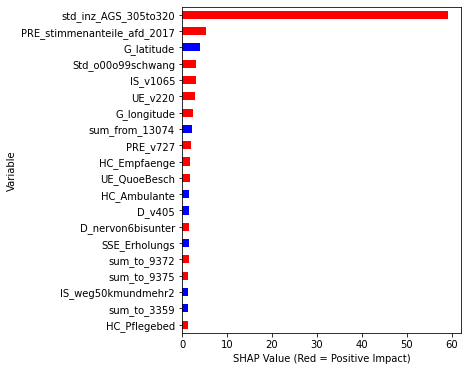

In [22]:
def ABS_SHAP(df_shap,df):
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)[-20::]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values_cb,X) 

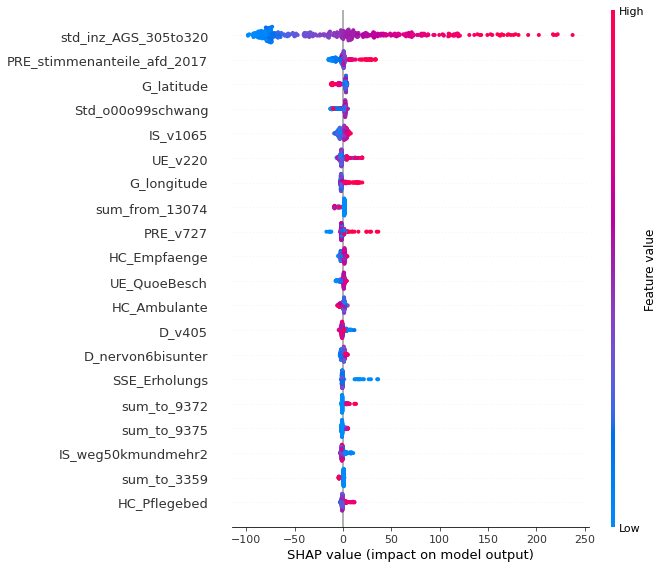

In [23]:
shap.summary_plot(shap_values_cb,X)

# Second CatBoost model with 20 most important features

In [24]:
top20feature = X.columns[np.argsort(np.abs(shap_values_cb).mean(0))][-20:][::-1]
top10feature = X.columns[np.argsort(np.abs(shap_values_cb).mean(0))][-10:][::-1]

In [25]:
# initialize Pool
train_pool_20 = Pool(X[top20feature],Y)
 

# specify the training parameters 
model = CatBoostRegressor(random_seed=0, logging_level = 'Silent')
#train the model
cb_20 = model.fit(train_pool_20)
print("R2 of second model with top20 feature: ",cb_20.score(X[top20feature], Y))

R2 of second model with top20 feature:  0.9965174616216225


In [26]:
preds_20 = cb_20.predict(train_pool_20,
                    prediction_type="RawFormulaVal"
                  )

print("RMSE of second model on top20 data: ", eval_metric(Y, preds_20, 'RMSE')[0])

RMSE of second model on top20 data:  8.501854440186767


# Compare top 10 features of both Models

In [27]:
shap_values_cb_20 = shap.TreeExplainer(cb_20).shap_values(X[top20feature])

top10feature_from_top_20 = X[top20feature].columns[np.argsort(np.abs(shap_values_cb_20).mean(0))][-10:][::-1]

print("10 most important features from model with all features:", "\n", list(top10feature), "\n\n",
     "10 most important features from model with top20 features:", "\n", list(top10feature_from_top_20)) 

10 most important features from model with all features: 
 ['std_inz_AGS_305to320', 'PRE_stimmenanteile_afd_2017', 'G_latitude', 'Std_o00o99schwang', 'IS_v1065', 'UE_v220', 'G_longitude', 'sum_from_13074', 'PRE_v727', 'HC_Empfaenge'] 

 10 most important features from model with top20 features: 
 ['std_inz_AGS_305to320', 'G_latitude', 'PRE_stimmenanteile_afd_2017', 'G_longitude', 'UE_v220', 'Std_o00o99schwang', 'HC_Empfaenge', 'sum_from_13074', 'IS_v1065', 'SSE_Erholungs']


In [28]:
# features which are on top10 of both models:
for i in top10feature :
    if i in list(top10feature_from_top_20) :
         print(i)

std_inz_AGS_305to320
PRE_stimmenanteile_afd_2017
G_latitude
Std_o00o99schwang
IS_v1065
UE_v220
G_longitude
sum_from_13074
HC_Empfaenge


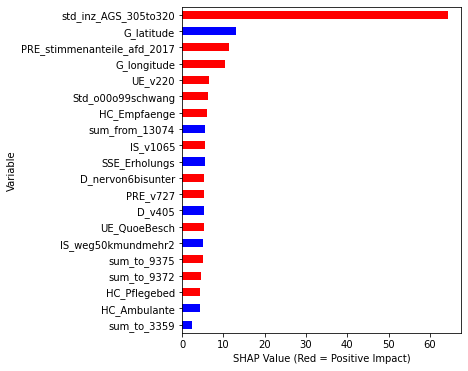

In [29]:
ABS_SHAP(shap_values_cb_20,X[top20feature]) 

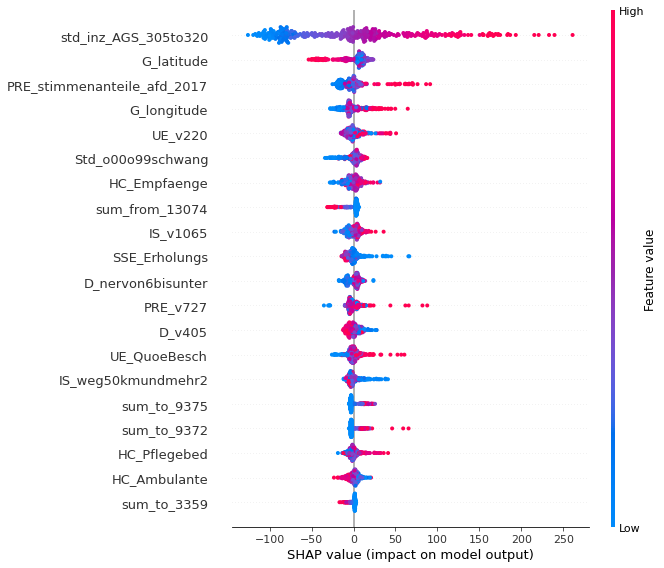

In [30]:
shap.summary_plot(shap_values_cb_20,X[top20feature])

# Hold out validation of the second model

In [31]:
import random
iterations = range(0,20)

r2_reg_k_test_top20 = list(range(0,20))
rmse_reg_k_test_top20 = list(range(0,20))
r2_cb_k_train_top20 = list(range(0,20))
r2_cb_k_test_top20 = list(range(0,20))

for i in iterations:
    rs = random.sample(range(0,401), 80)
    k_test_x = X[top20feature].iloc[rs]
    k_test_y = Y.iloc[rs]
    k_train_x = X[top20feature].drop(rs)
    k_train_y = Y.drop(rs)
    # initialize Pool 
    train_pool_k = Pool(data=k_train_x,
                        label=k_train_y,
                        feature_names = list(X[top20feature].columns))
        
    test_pool_k = Pool(data=k_test_x,
                       label=k_test_y,
                       feature_names = list(X[top20feature].columns))

    
    #fit the model
    model = CatBoostRegressor(random_seed=0,
                              logging_level="Silent",
                              #iterations = scores_k.sort_values(by= "test-R2-mean")["iterations"].iloc[-1]
                             )

    cb_k = model.fit(train_pool_k)
    
    # make the prediction using the resulting model
    preds_k = cb_k.predict(test_pool_k,
                    prediction_type="RawFormulaVal"
                  )
    
    rmse_reg_k_test_top20[i] = eval_metric(np.array(k_test_y), preds_k, "RMSE")[0]
    
    preds_k = preds_k.reshape(-1, 1)
    #LinearRegression
    reg_k = LinearRegression().fit(preds_k, k_test_y)

    
    r2_cb_k_train_top20[i] = cb_k.score(train_pool_k)
    r2_reg_k_test_top20[i] = reg_k.score(preds_k, k_test_y)

    r2_cb_k_test_top20[i] =  cb_k.score(test_pool_k)
    
    print(i/len(iterations)*100,"%", "  " , end="")

0.0 %   5.0 %   10.0 %   15.0 %   20.0 %   25.0 %   30.0 %   35.0 %   40.0 %   45.0 %   50.0 %   55.00000000000001 %   60.0 %   65.0 %   70.0 %   75.0 %   80.0 %   85.0 %   90.0 %   95.0 %   

In [32]:
print("Mean R2 of CatBoost_models on train sets with top20 features:",sum(r2_cb_k_train_top20)/len(r2_cb_k_train_top20))
print("Mean R2 of linReg_modesl with top20 features: ", sum(r2_reg_k_test_top20)/len(r2_reg_k_test_top20))
print("Mean RMSE of CatBoost_models on test sets with top20 features: ", sum(rmse_reg_k_test_top20)/len(rmse_reg_k_test_top20))
print("Mean R2 of CatBoost_models on test sets with top20 features:",sum(r2_cb_k_test_top20)/len(r2_cb_k_test_top20))

Mean R2 of CatBoost_models on train sets with top20 features: 0.9978667018885184
Mean R2 of linReg_modesl with top20 features:  0.7206221123788591
Mean RMSE of CatBoost_models on test sets with top20 features:  77.37671572226672
Mean R2 of CatBoost_models on test sets with top20 features: 0.7099937268270564


# descriptives of top20 features

In [33]:
X[top20feature].describe()

,std_inz_AGS_305to320,PRE_stimmenanteile_afd_2017,G_latitude,Std_o00o99schwang,IS_v1065,UE_v220,G_longitude,sum_from_13074,PRE_v727,HC_Empfaenge,UE_QuoeBesch,HC_Ambulante,D_v405,D_nervon6bisunter,SSE_Erholungs,sum_to_9372,sum_to_9375,IS_weg50kmundmehr2,sum_to_3359,HC_Pflegebed
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,294.754181,13.388280,50.615307,128.511276,21.925186,34.556614,9.866997,61.638405,11.654364,50.857349,49.557602,23.816227,9.543892,-1.103990,70.509460,18.104738,50.733166,11.484292,33.700748,428.125519
std,132.152008,5.329521,1.740311,22.568268,15.378860,13.284161,2.026269,489.591461,3.181232,6.518342,5.944391,5.234064,4.668760,7.789559,56.734703,135.079849,447.300385,3.481254,269.825012,106.029327
min,51.452923,4.900000,47.500000,0.000000,0.000000,4.600000,6.083333,0.000000,4.600000,28.600000,29.600000,0.000000,-8.200000,-14.700000,14.000000,0.000000,0.000000,4.900000,0.000000,186.399994
25%,187.580597,9.800000,49.283333,119.283463,13.000000,26.100000,8.216666,0.000000,10.300000,46.400002,45.700001,20.100000,6.800000,-6.800000,39.700001,0.000000,0.000000,9.000000,0.000000,351.000000
50%,295.148651,12.000000,50.549999,128.318710,21.000000,32.000000,9.766666,0.000000,12.100000,51.099998,49.900002,23.799999,10.200000,-3.500000,52.799999,0.000000,0.000000,10.800000,0.000000,424.200012
75%,375.239899,15.300000,51.849998,140.111618,32.000000,41.400002,11.416667,0.000000,13.800000,55.599998,53.599998,27.200001,12.900000,4.000000,76.699997,0.000000,0.000000,13.300000,0.000000,497.200012
max,734.390442,35.500000,54.783333,201.136475,79.000000,101.000000,14.983334,6771.000000,20.400000,66.699997,66.400002,44.400002,21.200001,28.799999,384.600006,2028.000000,7763.000000,24.200001,3369.000000,816.200012


In [ ]:
pd.DataFrame(Y).describe()

In [ ]:
frames = [ Y.describe(), X[top20feature].describe()]
des = pd.concat(frames, axis=1)
with pd.ExcelWriter(r"C:\Users\Constantin\Desktop\descriptives1.xlsx") as writer:  
    des.to_excel(writer, sheet_name='period 1')